In [1055]:
from sdfsdfsfdsfd import BasicModel, InverseModel, SuperModel
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas_datareader as pdr

import seaborn as sns

plt.style.use("fivethirtyeight")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [1017]:
#chargement dataset nasdaq
start_date = '1998-01-01'
end_date = datetime.now()
df = pdr.DataReader('^NDX', 'yahoo', start_date, end_date)

#on passe l'index Date en colomne
df = df.rename_axis('Date').reset_index()

#delete Adj Close (pareil que Close)
df = df.drop('Adj Close', 1)

In [1018]:
df.head()

,Date,High,Low,Open,Close,Volume
0,1998-01-02,1008.229980,987.719971,990.799988,1008.229980,434140000
1,1998-01-05,1028.619995,1007.250000,1008.229980,1017.419983,681560000
2,1998-01-06,1018.219971,1001.940002,1017.419983,1006.289978,635700000
3,1998-01-07,1006.289978,978.700012,1006.289978,991.190002,691340000
4,1998-01-08,1003.710022,982.270020,990.969971,994.549988,645050000


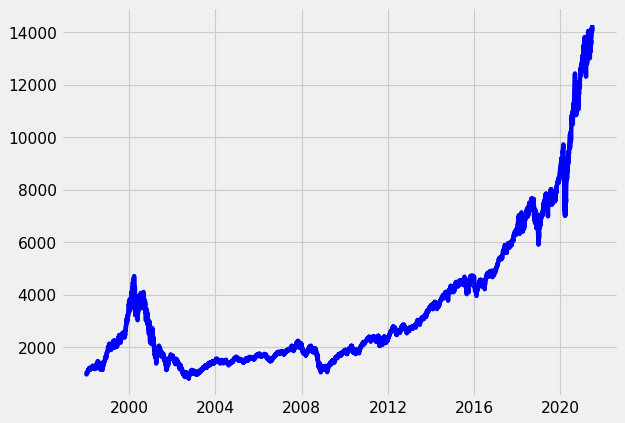

In [1019]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df.Date, df.Close, color="b")

<h1>Partie 1 : Moyenne mobile prix du cours</h1>

In [1020]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "MM_indicator", "MM_acivity", "MM_pf", "MM_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [1021]:
#indicateur MM100
df[indicator] = df.Close.rolling(window=150).mean()

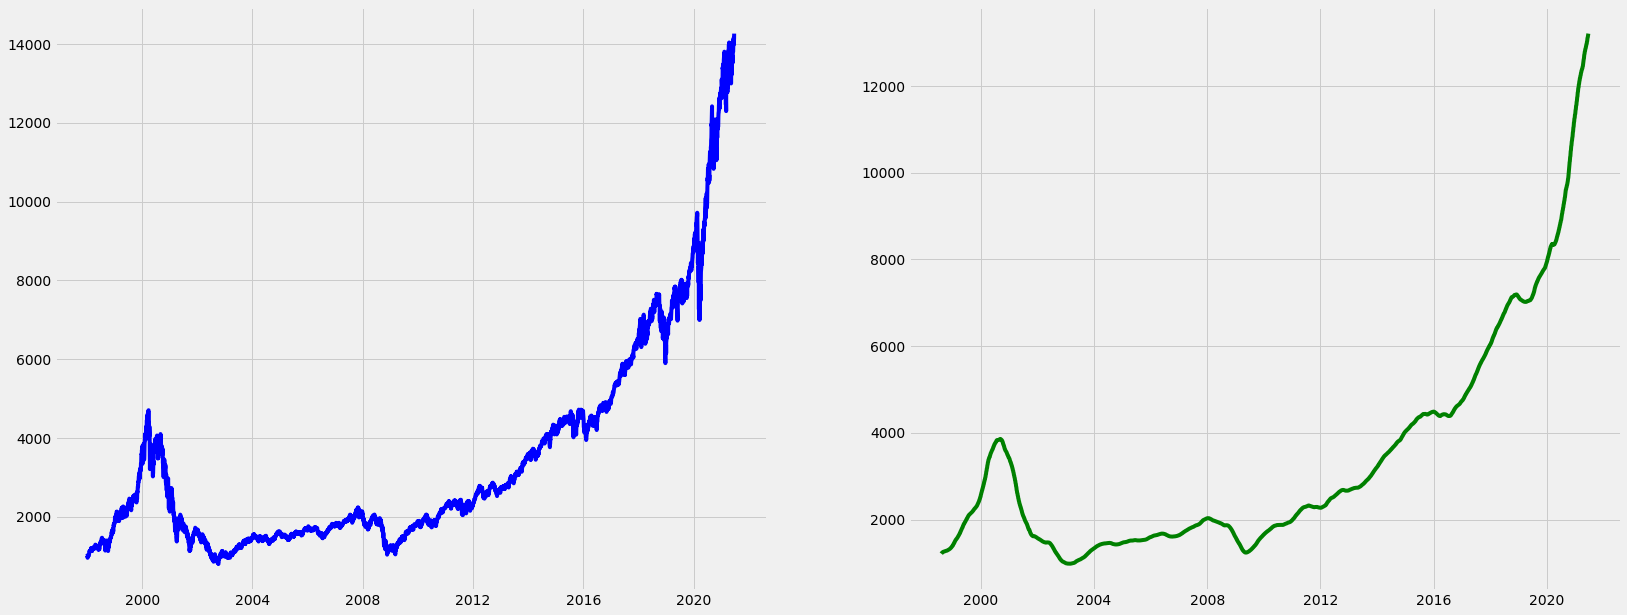

In [1022]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [1023]:
model_mm100 = BasicModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5)

1998-10-08 00:00:00 || GO SELL || 193 || 1128.8800048828125 || 1128.8800048828125 || 1126.3800048828125
1998-10-09 00:00:00 || GO BUY || 194 || 1197.8699951171875|| 1128.8800048828125 || 1123.8800048828125

2000-07-28 00:00:00 || GO SELL || 648 || 3477.31005859375 || 3277.0382528367236 || 3260.023697531191
2000-07-31 00:00:00 || GO BUY || 649 || 3609.35009765625|| 3277.0382528367236 || 3257.523697531191

2000-08-01 00:00:00 || GO SELL || 650 || 3521.14990234375 || 3196.958624613787 || 3175.4209384239716
2000-08-08 00:00:00 || GO BUY || 655 || 3686.3701171875|| 3196.958624613787 || 3172.9209384239716

2000-09-08 00:00:00 || GO SELL || 677 || 3813.43994140625 || 3307.158348881905 || 3279.792079434939
2001-11-09 00:00:00 || GO BUY || 969 || 1514.9599609375|| 3307.158348881905 || 3277.292079434939

2001-11-16 00:00:00 || GO SELL || 974 || 1582.1400146484375 || 3453.8124395754794 || 3420.1217670833325
2002-04-18 00:00:00 || GO BUY || 1077 || 1395.9000244140625|| 3453.8124395754794 || 3417.6

2011-08-04 00:00:00 || GO SELL || 3419 || 2207.199951171875 || 6514.119264118479 || 6153.81625303894
2011-10-12 00:00:00 || GO BUY || 3467 || 2307.179931640625|| 6514.119264118479 || 6151.31625303894

2011-11-01 00:00:00 || GO SELL || 3481 || 2298.3701171875 || 6489.245529194129 || 6125.327857492248
2011-11-03 00:00:00 || GO BUY || 3483 || 2367.7099609375|| 6489.245529194129 || 6122.827857492248

2011-11-09 00:00:00 || GO SELL || 3487 || 2314.10009765625 || 6342.315554088219 || 5981.694338290082
2011-11-11 00:00:00 || GO BUY || 3489 || 2355.780029296875|| 6342.315554088219 || 5979.194338290082

2011-11-17 00:00:00 || GO SELL || 3493 || 2272.090087890625 || 6117.002489837473 || 5764.2812871541355
2012-01-04 00:00:00 || GO BUY || 3524 || 2329.7099609375|| 6117.002489837473 || 5761.7812871541355

2012-10-19 00:00:00 || GO SELL || 3725 || 2678.320068359375 || 7032.330548195432 || 6621.45521744367
2012-11-28 00:00:00 || GO BUY || 3750 || 2665.27001953125|| 7032.330548195432 || 6618.95521744

In [1024]:
df[185:200]

,Date,High,Low,Open,Close,Volume,MM_indicator,MM_acivity,MM_pf,MM_pf_frais
185,1998-09-28,1413.160034,1367.739990,1390.089966,1383.250000,696680000,1273.875597,1,1383.250000,1383.250000
186,1998-09-29,1400.390015,1369.040039,1383.300049,1384.890015,781710000,1275.105597,1,1384.890015,1384.890015
187,1998-09-30,1384.439941,1343.599976,1384.439941,1345.479980,737760000,1276.028997,1,1345.479980,1345.479980
188,1998-10-01,1345.479980,1266.380005,1345.479980,1273.739990,856960000,1276.559731,1,1273.739990,1273.739990
189,1998-10-02,1285.689941,1228.699951,1273.739990,1276.439941,871450000,1277.218730,1,1276.439941,1276.439941
190,1998-10-05,1267.489990,1174.939941,1267.489990,1207.680054,877180000,1277.431798,1,1207.680054,1207.680054
191,1998-10-06,1250.400024,1174.400024,1207.680054,1184.839966,887180000,1277.464931,1,1184.839966,1184.839966
192,1998-10-07,1204.869995,1139.339966,1184.099976,1151.089966,940230000,1277.626664,1,1151.089966,1151.089966
193,1998-10-08,1144.689941,1063.270020,1144.689941,1128.880005,1209510000,1277.398464,0,1128.880005,1126.380005
194,1998-10-09,1199.130005,1128.880005,1128.880005,1197.869995,892830000,1277.861798,1,1128.880005,1123.880005


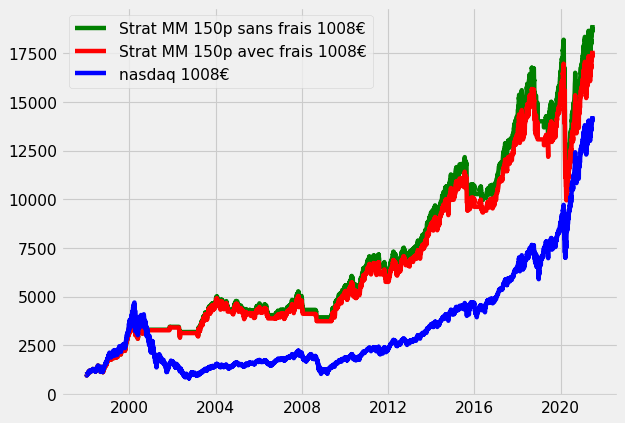

In [1025]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="Strat MM 150p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="Strat MM 150p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [1026]:
model_mm100.stats(portefeuille, portefeuille_frais)

Départ : 1008€

Stratégie sans frais final : 18952€
Stratégie avec frais final: 17631€
Sans stratégie final: 14267€

Total frais: 345€
Total transactions: 138


<h1>Partie 2 : Moyenne mobile de 3 GAFAS</h1>

In [1027]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "GAFA_indicator", "GAFA_acivity", "GAFA_pf", "GAFA_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [1028]:
#viz
tech_list = ['AAPL','MSFT', 'AMZN']

end = datetime.now()
start = '1998-01-01'

for stock in tech_list:   
    globals()[stock] = pdr.DataReader(stock, 'yahoo', start, end)



company_list = [AAPL, MSFT, AMZN]
company_name = ["APPLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
# df = pd.concat(company_list, axis=0)  ne pas toucher au df car on l'utilise tous pour nos modèles

/home/adrienfontaine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/adrienfontaine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


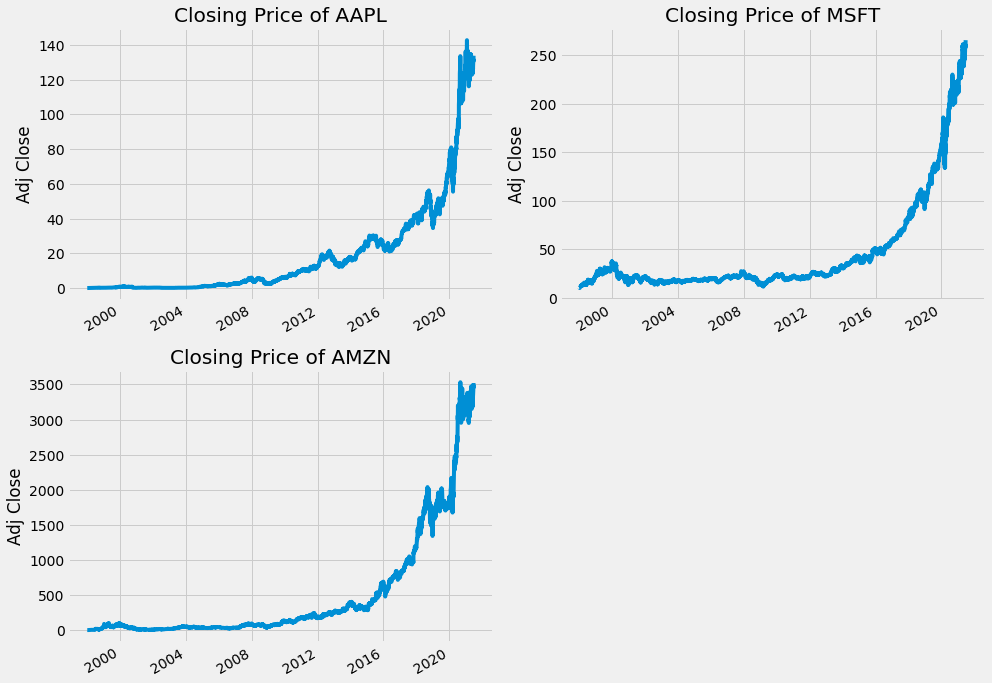

In [1029]:
plt.figure(figsize=(14, 14))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3,2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


In [1030]:
ma_day = [20, 50, 100]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

/home/adrienfontaine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/adrienfontaine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/adrienfontaine/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


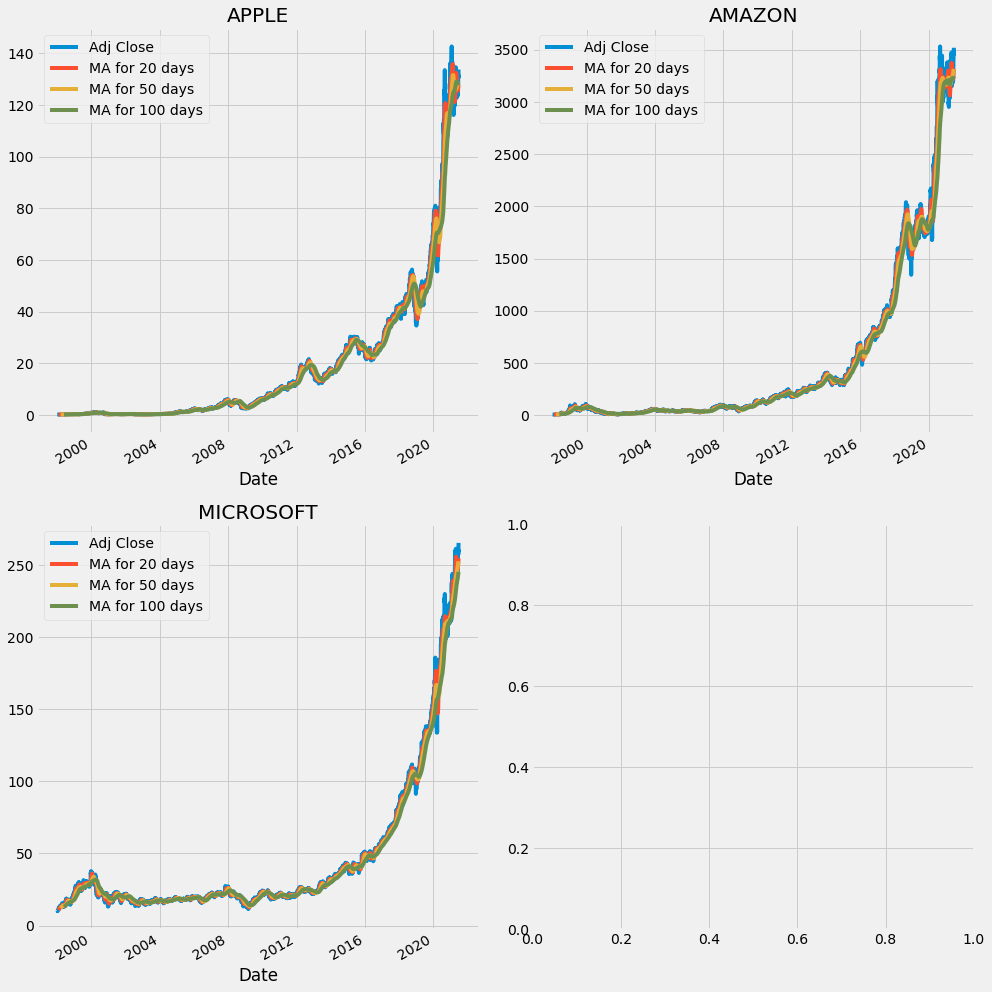

In [1031]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(14)
fig.set_figwidth(14)

AAPL[['Adj Close', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

MSFT[['Adj Close', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(ax=axes[0,1])
axes[0,1].set_title('AMAZON')


fig.tight_layout()

In [1032]:
#indicateur moyenne mobile des GAFAS
#calculs moyennes mobiles qu'on met sous la même echelle
df_mm_gafam = df
df_mm_gafam['AAPL'] = AAPL.reset_index().Close.rolling(window=150).mean()/AAPL.Close.values[-1]
df_mm_gafam['MSFT'] = MSFT.reset_index().Close.rolling(window=150).mean()/MSFT.Close.values[-1]
df_mm_gafam['AMZN'] = AMZN.reset_index().Close.rolling(window=150).mean()/AMZN.Close.values[-1]

#sommes des moyennes
df[indicator] = df_mm_gafam['AMZN'] +df_mm_gafam['MSFT'] + df_mm_gafam['AAPL']


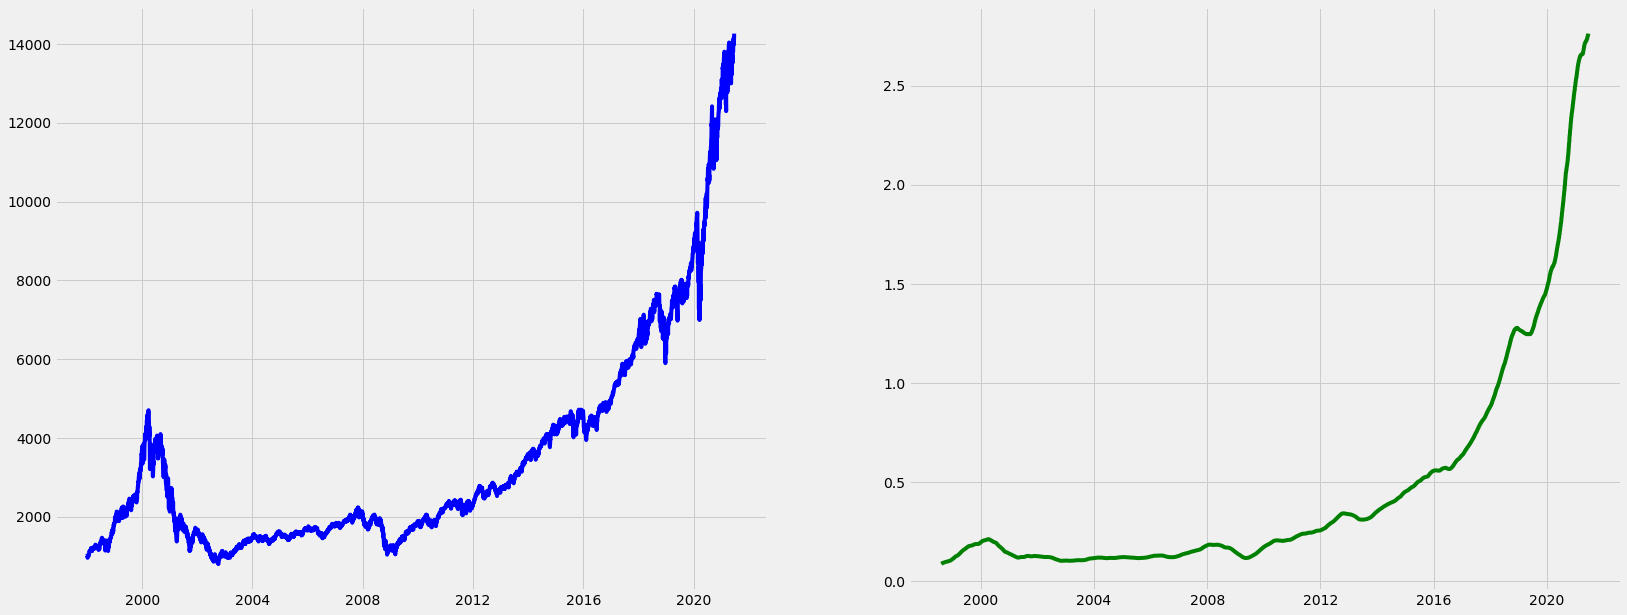

In [1033]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [1034]:
model_gafas = BasicModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5)

1999-11-01 00:00:00 || GO SELL || 461 || 2616.360107421875 || 2616.360107421875 || 2613.860107421875
1999-11-02 00:00:00 || GO BUY || 462 || 2626.989990234375|| 2616.360107421875 || 2611.360107421875

1999-11-03 00:00:00 || GO SELL || 463 || 2672.719970703125 || 2661.905045566441 || 2654.3180068250704
1999-11-15 00:00:00 || GO BUY || 471 || 2875.8701171875|| 2661.905045566441 || 2651.8180068250704

1999-11-16 00:00:00 || GO SELL || 472 || 2940.25 || 2721.4950576004917 || 2708.6822081146743
1999-11-18 00:00:00 || GO BUY || 474 || 3003.489990234375|| 2721.4950576004917 || 2706.1822081146743

2000-02-18 00:00:00 || GO SELL || 537 || 3965.75 || 3593.409353708866 || 3570.690563885748
2000-02-22 00:00:00 || GO BUY || 538 || 3969.1298828125|| 3593.409353708866 || 3568.190563885748

2000-04-04 00:00:00 || GO SELL || 568 || 4034.169921875 || 3652.292658522054 || 3624.160621684191
2001-05-01 00:00:00 || GO BUY || 838 || 1919.010009765625|| 3652.292658522054 || 3621.660621684191

2001-06-11 00:00


2004-06-09 00:00:00 || GO SELL || 1617 || 1469.5 || 2739.2130984686237 || 2519.58283123281
2004-06-10 00:00:00 || GO BUY || 1618 || 1481.27001953125|| 2739.2130984686237 || 2517.08283123281

2004-08-04 00:00:00 || GO SELL || 1655 || 1379.2099609375 || 2550.480291050471 || 2341.1548823418725
2004-09-09 00:00:00 || GO BUY || 1680 || 1391.530029296875|| 2550.480291050471 || 2338.6548823418725

2004-11-26 00:00:00 || GO SELL || 1735 || 1578.260009765625 || 2892.7302784075027 || 2649.9799319697986
2004-11-29 00:00:00 || GO BUY || 1736 || 1580.43994140625|| 2892.7302784075027 || 2647.4799319697986

2005-01-18 00:00:00 || GO SELL || 1770 || 1573.489990234375 || 2880.009558270268 || 2633.3376950371276
2005-07-28 00:00:00 || GO BUY || 1903 || 1618.6400146484375|| 2880.009558270268 || 2630.8376950371276

2005-07-29 00:00:00 || GO SELL || 1904 || 1605.1400146484375 || 2855.9893136916157 || 2606.3956272755595
2005-08-01 00:00:00 || GO BUY || 1905 || 1610.1099853515625|| 2855.9893136916157 || 2603

2018-12-14 00:00:00 || GO SELL || 5272 || 6594.9599609375 || 9131.995370743713 || 7920.917693997913
2019-01-30 00:00:00 || GO BUY || 5302 || 6807.91015625|| 9131.995370743713 || 7918.417693997913

2019-01-31 00:00:00 || GO SELL || 5303 || 6906.83984375 || 9264.697687246779 || 8030.984810041229
2019-02-05 00:00:00 || GO BUY || 5306 || 7023.52001953125|| 9264.697687246779 || 8028.484810041229

2019-02-06 00:00:00 || GO SELL || 5307 || 6997.6201171875 || 9230.533227734059 || 7996.379003840049
2019-04-23 00:00:00 || GO BUY || 5359 || 7810.7099609375|| 9230.533227734059 || 7993.879003840049

2019-05-02 00:00:00 || GO SELL || 5366 || 7724.06005859375 || 9128.132190342589 || 7902.697073708905
2019-05-03 00:00:00 || GO BUY || 5367 || 7845.72998046875|| 9128.132190342589 || 7900.197073708905

2019-05-07 00:00:00 || GO SELL || 5369 || 7640.14990234375 || 8888.949586111052 || 7690.689805340113
2019-05-16 00:00:00 || GO BUY || 5376 || 7580.14013671875|| 8888.949586111052 || 7688.189805340113

2019

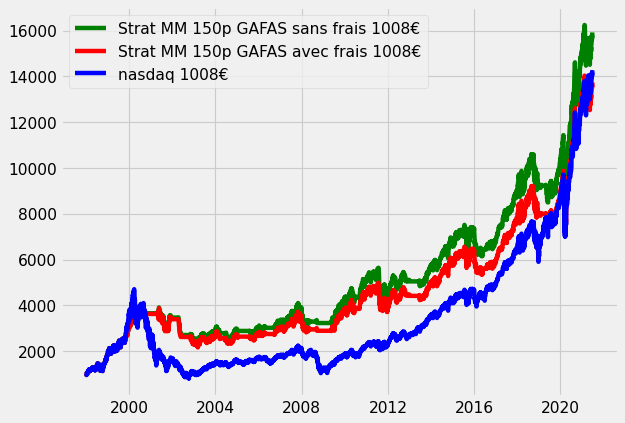

In [1035]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="Strat MM 150p GAFAS sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="Strat MM 150p GAFAS avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [1036]:
model_gafas.stats(portefeuille, portefeuille_frais)

Départ : 1008€

Stratégie sans frais final : 15922€
Stratégie avec frais final: 13748€
Sans stratégie final: 14267€

Total frais: 475€
Total transactions: 190


<h1>Partie 3 : Moyenne mobile du VIX</h1>

In [1037]:
#chargement dataset VIX
start_date = '1998-01-01'
end_date = datetime.now()
df_vix = pdr.DataReader('^VIX', 'yahoo', start_date, end_date)

#on passe l'index Date en colomne
df_vix = df_vix.rename_axis('Date').reset_index()

len(df), len(df_vix)

(5906, 5906)

In [1038]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "VIX_indicator", "VIX_acivity", "VIX_pf", "VIX_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [1039]:
#indicateur VIX100
df[indicator] = df_vix.Close.rolling(window=100).mean()

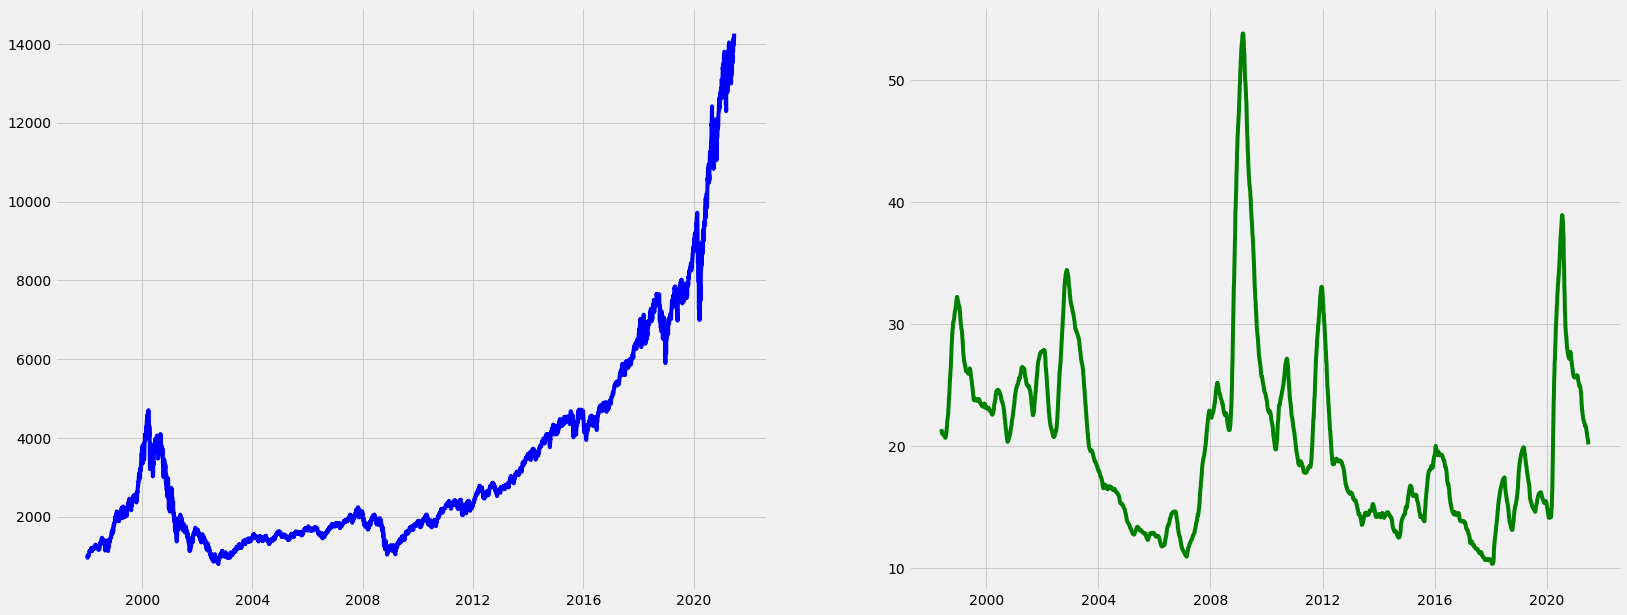

In [1040]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [1041]:
model_vix100 = BasicModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5)

1998-05-28 00:00:00 || GO SELL || 100 || 1214.8299560546875 || 1214.8299560546875 || 1212.3299560546875
1998-06-11 00:00:00 || GO BUY || 110 || 1185.1099853515625|| 1214.8299560546875 || 1209.8299560546875

1998-06-17 00:00:00 || GO SELL || 114 || 1224.0799560546875 || 1254.7772085307402 || 1247.112793534728
1998-07-21 00:00:00 || GO BUY || 137 || 1431.8900146484375|| 1254.7772085307402 || 1244.612793534728

1998-12-22 00:00:00 || GO SELL || 245 || 1767.8199462890625 || 1549.1554202465588 || 1534.1063729115795
1999-01-13 00:00:00 || GO BUY || 259 || 1948.7099609375|| 1549.1554202465588 || 1531.6063729115795

1999-01-14 00:00:00 || GO SELL || 260 || 1906.1199951171875 || 1515.297905418179 || 1495.6324007042967
1999-04-19 00:00:00 || GO BUY || 324 || 1967.5799560546875|| 1515.297905418179 || 1493.1324007042967

1999-04-26 00:00:00 || GO SELL || 329 || 2260.659912109375 || 1741.0083992474708 || 1713.0412421013789
1999-05-04 00:00:00 || GO BUY || 335 || 2097.550048828125|| 1741.00839924747

2001-07-09 00:00:00 || GO BUY || 885 || 1697.050048828125|| 1273.7538922537758 || 1116.9589423645068

2001-07-12 00:00:00 || GO SELL || 888 || 1750.1300048828125 || 1313.594084752521 || 1149.3949371022804
2001-09-05 00:00:00 || GO BUY || 926 || 1415.300048828125|| 1313.594084752521 || 1146.8949371022804

2001-12-05 00:00:00 || GO SELL || 986 || 1720.9100341796875 || 1597.2423961699603 || 1392.047401481001
2001-12-07 00:00:00 || GO BUY || 988 || 1673.9000244140625|| 1597.2423961699603 || 1389.547401481001

2001-12-18 00:00:00 || GO SELL || 995 || 1657.6800537109375 || 1581.7652323645923 || 1373.5827872185603
2001-12-24 00:00:00 || GO BUY || 999 || 1577.31005859375|| 1581.7652323645923 || 1371.0827872185603

2001-12-26 00:00:00 || GO SELL || 1000 || 1590.8399658203125 || 1595.333355341742 || 1380.3437107034092
2001-12-28 00:00:00 || GO BUY || 1002 || 1621.1300048828125|| 1595.333355341742 || 1377.8437107034092

2002-01-03 00:00:00 || GO SELL || 1005 || 1666.6600341796875 || 1640.13887629

2006-04-07 00:00:00 || GO BUY || 2078 || 1723.030029296875|| 1935.1813851569011 || 1429.9694211835672

2006-04-24 00:00:00 || GO SELL || 2088 || 1706.43994140625 || 1916.548611079739 || 1413.7010492022491
2006-04-27 00:00:00 || GO BUY || 2091 || 1717.1400146484375|| 1916.548611079739 || 1411.2010492022491

2006-05-03 00:00:00 || GO SELL || 2095 || 1686.300048828125 || 1882.127251636451 || 1383.3557705693377
2006-05-08 00:00:00 || GO BUY || 2098 || 1715.22998046875|| 1882.127251636451 || 1380.8557705693377

2006-06-29 00:00:00 || GO SELL || 2135 || 1585.56005859375 || 1739.8400385760715 || 1273.9642534379527
2006-07-03 00:00:00 || GO BUY || 2137 || 1586.25|| 1739.8400385760715 || 1271.4642534379527

2006-08-30 00:00:00 || GO SELL || 2178 || 1581.949951171875 || 1735.1236337729172 || 1265.517534211476
2006-08-31 00:00:00 || GO BUY || 2179 || 1579.72998046875|| 1735.1236337729172 || 1263.017534211476

2006-09-01 00:00:00 || GO SELL || 2180 || 1589.469970703125 || 1745.8217198112454 || 126

2013-04-17 00:00:00 || GO BUY || 3845 || 2781.97998046875|| 1522.0255882623983 || 844.1203119752297

2013-04-19 00:00:00 || GO SELL || 3847 || 2780.4599609375 || 1521.1939832050423 || 841.1591011218321
2013-05-29 00:00:00 || GO BUY || 3874 || 2994.820068359375|| 1521.1939832050423 || 838.6591011218321

2013-07-15 00:00:00 || GO SELL || 3906 || 3079.85009765625 || 1564.3842804535227 || 859.9706177775041
2013-07-30 00:00:00 || GO BUY || 3917 || 3085.330078125|| 1564.3842804535227 || 857.4706177775041

2013-08-02 00:00:00 || GO SELL || 3920 || 3143.52001953125 || 1593.8888803865611 || 871.1426848635568
2013-08-05 00:00:00 || GO BUY || 3921 || 3143.18994140625|| 1593.8888803865611 || 868.6426848635568

2013-08-08 00:00:00 || GO SELL || 3924 || 3130.1298828125 || 1587.2662191545573 || 862.5334456598088
2013-08-12 00:00:00 || GO BUY || 3926 || 3125.929931640625|| 1587.2662191545573 || 860.0334456598088

2013-08-13 00:00:00 || GO SELL || 3927 || 3141.06005859375 || 1594.9489055644895 || 861.6

2016-09-09 00:00:00 || GO BUY || 4702 || 4681.5400390625|| 2672.7287124561008 || 1141.5103810690737

2016-09-21 00:00:00 || GO SELL || 4710 || 4853.75 || 2771.0447587417525 || 1181.0007211053455
2016-10-12 00:00:00 || GO BUY || 4725 || 4819.64013671875|| 2771.0447587417525 || 1178.5007211053455

2016-10-20 00:00:00 || GO SELL || 4731 || 4832.7099609375 || 2778.5592342776167 || 1179.1965608007556
2016-10-26 00:00:00 || GO BUY || 4735 || 4860.58984375|| 2778.5592342776167 || 1176.6965608007556

2016-11-02 00:00:00 || GO SELL || 4740 || 4726.91015625 || 2702.1411570320984 || 1141.8341452119491
2016-11-03 00:00:00 || GO BUY || 4741 || 4679.10009765625|| 2702.1411570320984 || 1139.3341452119491

2016-11-07 00:00:00 || GO SELL || 4743 || 4773.72998046875 || 2756.7891226015595 || 1159.875981119604
2016-12-01 00:00:00 || GO BUY || 4760 || 4734.10009765625|| 2756.7891226015595 || 1157.375981119604

2016-12-05 00:00:00 || GO SELL || 4762 || 4778.14013671875 || 2782.4347781943834 || 1165.64273348

2021-03-04 00:00:00 || GO BUY || 5829 || 12464.0|| 4576.772938839317 || 1633.552306003897

2021-03-05 00:00:00 || GO SELL || 5830 || 12668.509765625 || 4651.868795790607 || 1657.8556916936463
2021-03-08 00:00:00 || GO BUY || 5831 || 12299.080078125|| 4651.868795790607 || 1655.3556916936463

2021-03-09 00:00:00 || GO SELL || 5832 || 12794.490234375 || 4839.247285266094 || 1719.5338510894746
2021-05-12 00:00:00 || GO BUY || 5877 || 13001.6298828125|| 4839.247285266094 || 1717.0338510894746

2021-05-14 00:00:00 || GO SELL || 5879 || 13393.1201171875 || 4984.961174292566 || 1766.2352139840948


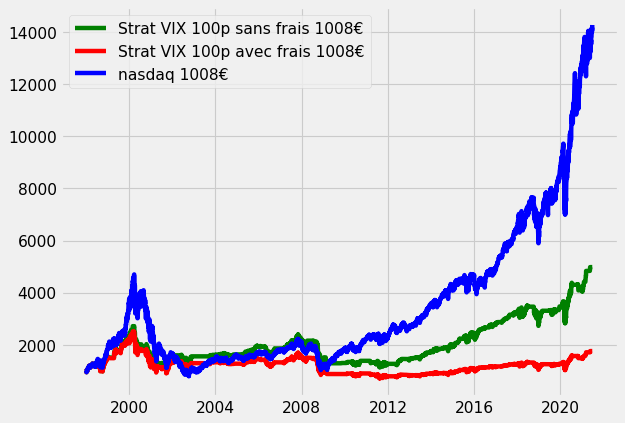

In [1042]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="Strat VIX 100p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="Strat VIX 100p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [1043]:
model_vix100.stats(portefeuille, portefeuille_frais)

Départ : 1008€

Stratégie sans frais final : 4984€
Stratégie avec frais final: 1766€
Sans stratégie final: 14267€

Total frais: 1237€
Total transactions: 495


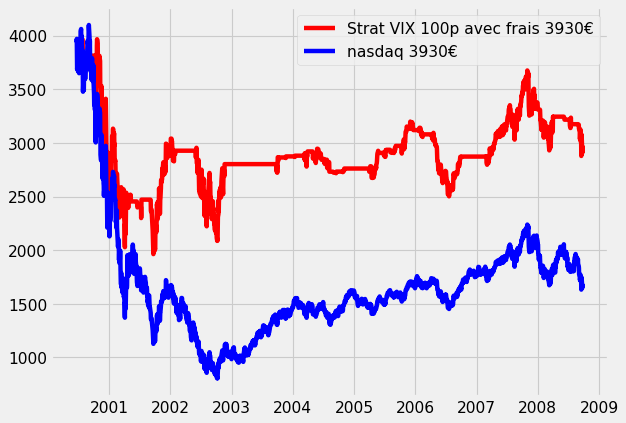

In [1044]:
plt.figure(figsize=(8, 6), dpi=80)
#plt.plot(df['Date'], df[portefeuille], color="g", label="RSI 100p sans frais 1008€")
plt.plot(df['Date'][620:2700], df[portefeuille_frais][620:2700]*2.15, color="r", label="Strat VIX 100p avec frais 3930€")
plt.plot(df['Date'][620:2700], df.Close[620:2700], color="b", label="nasdaq 3930€")
plt.legend(loc="upper right")
plt.show()

<h1>Partie 4 : Relative Strenght Index (RSI)</h1>

In [1045]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "RSI100_indicator", "RSI100_activity", "RSI100_pf", "RSI100_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [1046]:
#indicateur RSI100

delta = df.Close.diff()

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.clip(lower=0), delta.clip(upper=0)

# Calculate the SMA
roll_up2 = up.rolling(window=10).mean()
roll_down2 = down.abs().rolling(window=10).mean()

# Calculate the RSI based on SMA
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

df[indicator] = RSI2

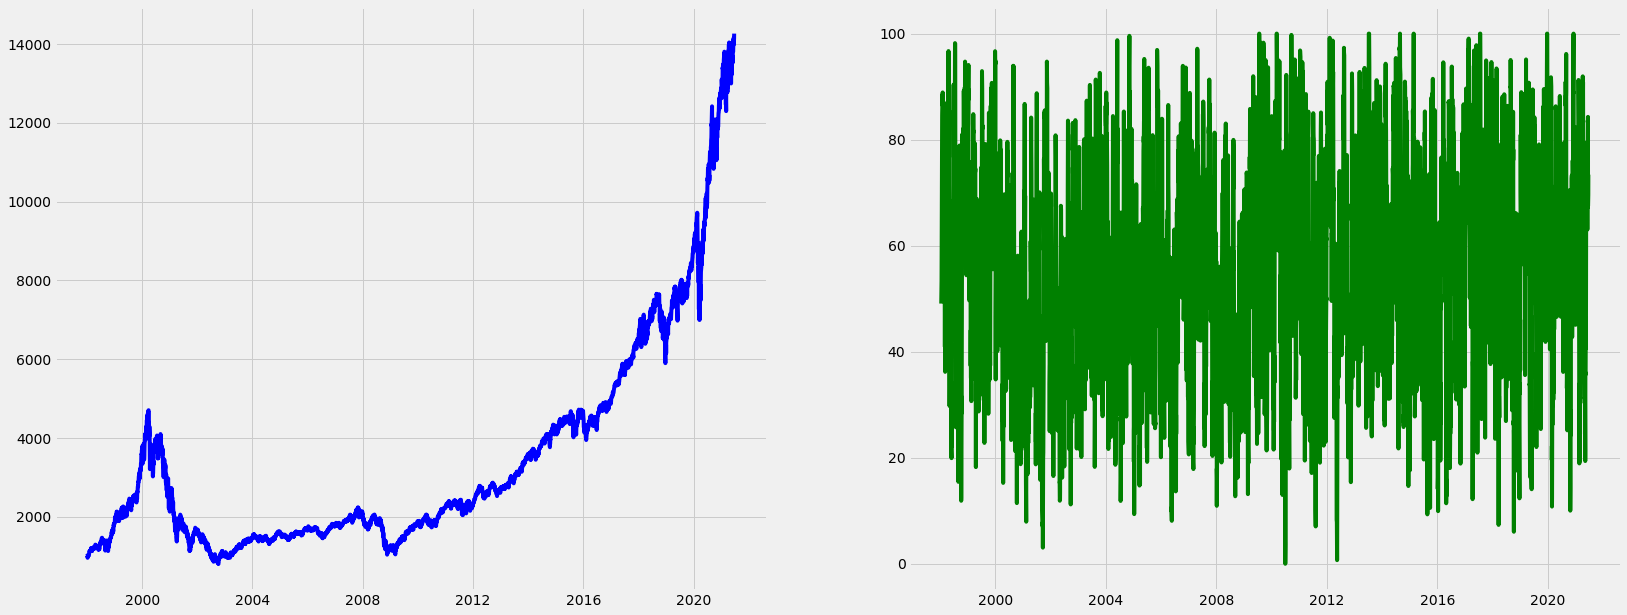

In [1047]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(25, 10))
ax1.plot(df.Date, df.Close, color="b")
ax2.plot(df.Date, df[indicator], color="g")
plt.show()

In [1048]:
model_rsi100 = RSIModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5,rsi_sell_sup=90, rsi_buy_inf=78)

1998-07-20 00:00:00 || GO SELL || 136 || 1465.8900146484375 || 1465.8900146484375 || 1463.3900146484375
1998-07-30 00:00:00 || GO BUY || 144 || 1422.050048828125|| 1465.8900146484375 || 1460.8900146484375

1999-12-30 00:00:00 || GO SELL || 502 || 3683.669921875 || 3797.2327065332397 || 3781.780736506199
2000-01-07 00:00:00 || GO BUY || 508 || 3529.60009765625|| 3797.2327065332397 || 3779.280736506199

2001-11-14 00:00:00 || GO SELL || 972 || 1585.8900146484375 || 1706.1404312024702 || 1695.5744041111761
2001-11-21 00:00:00 || GO BUY || 977 || 1552.010009765625|| 1706.1404312024702 || 1693.0744041111761

2003-08-22 00:00:00 || GO SELL || 1417 || 1304.5400390625 || 1434.0941686987549 || 1420.6115362512742
2003-09-11 00:00:00 || GO BUY || 1430 || 1350.800048828125|| 1434.0941686987549 || 1418.1115362512742

2004-06-02 00:00:00 || GO SELL || 1612 || 1464.219970703125 || 1554.5078810881762 || 1534.683266957231
2004-06-04 00:00:00 || GO BUY || 1614 || 1455.0400390625|| 1554.5078810881762 || 

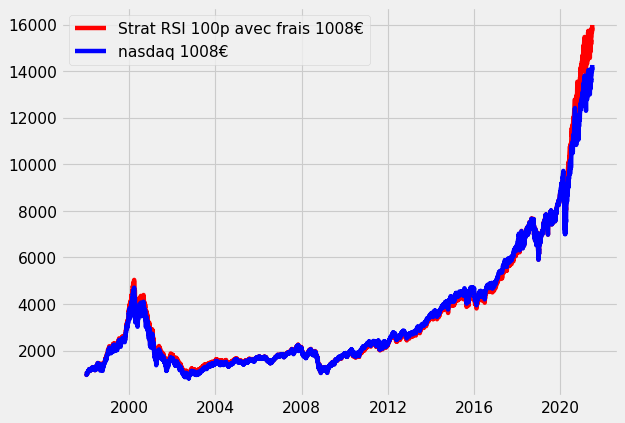

In [1049]:
plt.figure(figsize=(8, 6), dpi=80)
#plt.plot(df['Date'], df[portefeuille], color="g", label="Strat RSI 100p sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="Strat RSI 100p avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [1050]:
model_rsi100.stats(portefeuille, portefeuille_frais)

Départ : 1008€

Stratégie sans frais final : 17127€
Stratégie avec frais final: 15984€
Sans stratégie final: 14267€

Total frais: 180€
Total transactions: 72


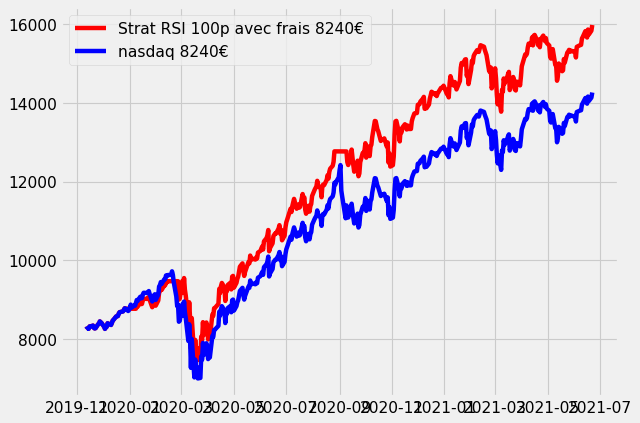

In [1051]:
plt.figure(figsize=(8, 6), dpi=80)
#plt.plot(df['Date'], df[portefeuille], color="g", label="RSI 100p sans frais 1008€")
plt.plot(df['Date'][5500:], df[portefeuille_frais][5500:], color="r", label="Strat RSI 100p avec frais 8240€")
plt.plot(df['Date'][5500:], df.Close[5500:], color="b", label="nasdaq 8240€")
plt.legend(loc="upper left")
plt.show()

<h1>Partie 5 : Créer un modèle à partir de tout les indicateurs</h1>

In [1090]:
#on créé les columns (différentes pour chaque modèle)
indicator, activity, portefeuille, portefeuille_frais = "supermodel_indicator", "supermodel_acivity", "supermodel_pf", "supermodel_pf_frais"
df[indicator], df[activity], df[portefeuille], df[portefeuille_frais] = 0,0,0,0

In [1091]:
#indicateur supermodel (somme des activities)
df[indicator] = df.MM_acivity + df.GAFA_acivity + df.VIX_acivity + df.RSI100_activity


In [1092]:
supermodel = SuperModel(df, indicator, activity, portefeuille, portefeuille_frais, frais = 2.5,buy_signal=3, sell_signal=2)

1998-07-20 00:00:00 || GO SELL || 136 || 1465.8900146484375 || 1465.8900146484375 || 1463.3900146484375
1998-07-21 00:00:00 || GO BUY || 137 || 1431.8900146484375|| 1465.8900146484375 || 1460.8900146484375

1999-11-01 00:00:00 || GO SELL || 461 || 2616.360107421875 || 2678.4851608423965 || 2666.849123574673
1999-11-02 00:00:00 || GO BUY || 462 || 2626.989990234375|| 2678.4851608423965 || 2664.349123574673

1999-11-03 00:00:00 || GO SELL || 463 || 2672.719970703125 || 2725.111556278426 || 2708.229442432352
1999-11-09 00:00:00 || GO BUY || 467 || 2763.580078125|| 2725.111556278426 || 2705.729442432352

1999-11-16 00:00:00 || GO SELL || 472 || 2940.25 || 2899.322265625779 || 2876.2010935862904
1999-11-18 00:00:00 || GO BUY || 474 || 3003.489990234375|| 2899.322265625779 || 2873.7010935862904

1999-12-30 00:00:00 || GO SELL || 502 || 3683.669921875 || 3555.9120418026578 || 3521.9886173491323
2000-01-04 00:00:00 || GO BUY || 505 || 3546.199951171875|| 3555.9120418026578 || 3519.488617349132

2005-03-31 00:00:00 || GO BUY || 1820 || 1482.530029296875|| 3986.614914087491 || 3680.641000460137

2005-04-07 00:00:00 || GO SELL || 1825 || 1499.7099609375 || 4032.812812509826 || 3720.7931960528135
2005-04-13 00:00:00 || GO BUY || 1829 || 1461.6800537109375|| 4032.812812509826 || 3718.2931960528135

2005-04-15 00:00:00 || GO SELL || 1831 || 1408.5899658203125 || 3886.3358963618507 || 3580.7400343979198
2005-04-21 00:00:00 || GO BUY || 1835 || 1447.3699951171875|| 3886.3358963618507 || 3578.2400343979198

2005-04-22 00:00:00 || GO SELL || 1836 || 1421.2099609375 || 3816.093539379495 || 3511.0662592618
2005-04-25 00:00:00 || GO BUY || 1837 || 1437.31005859375|| 3816.093539379495 || 3508.5662592618

2005-04-26 00:00:00 || GO SELL || 1838 || 1420.4300537109375 || 3771.276711449536 || 3464.8610821088932
2005-04-27 00:00:00 || GO BUY || 1839 || 1423.760009765625|| 3771.276711449536 || 3462.3610821088932

2005-05-10 00:00:00 || GO SELL || 1848 || 1450.3599853515625 || 3841.7351228140237 |

2011-08-08 00:00:00 || GO SELL || 3421 || 2060.2900390625 || 5645.465817635436 || 4942.807386727208
2011-08-09 00:00:00 || GO BUY || 3422 || 2160.7900390625|| 5645.465817635436 || 4940.307386727208

2011-08-10 00:00:00 || GO SELL || 3423 || 2073.090087890625 || 5416.333385701453 || 4737.295208885991
2011-08-11 00:00:00 || GO BUY || 3424 || 2167.070068359375|| 5416.333385701453 || 4734.795208885991

2011-08-18 00:00:00 || GO SELL || 3429 || 2073.030029296875 || 5181.2915148345355 || 4526.828697720678
2011-08-24 00:00:00 || GO BUY || 3433 || 2145.0400390625|| 5181.2915148345355 || 4524.328697720678

2011-11-25 00:00:00 || GO SELL || 3498 || 2150.8798828125 || 5195.397513938894 || 4534.146124056401
2011-11-28 00:00:00 || GO BUY || 3499 || 2224.219970703125|| 5195.397513938894 || 4531.646124056401

2011-11-29 00:00:00 || GO SELL || 3500 || 2211.389892578125 || 5165.428645359229 || 4503.0060054654705
2011-11-30 00:00:00 || GO BUY || 3501 || 2295.199951171875|| 5165.428645359229 || 4500.5060

2019-12-27 00:00:00 || GO SELL || 5532 || 8770.98046875 || 14037.415219697421 || 11859.837623972035
2020-01-08 00:00:00 || GO BUY || 5539 || 8912.3701171875|| 14037.415219697421 || 11857.337623972035

2020-02-18 00:00:00 || GO SELL || 5566 || 9629.7998046875 || 15167.401775681405 || 12809.331873458252
2020-02-24 00:00:00 || GO BUY || 5570 || 9079.6298828125|| 15167.401775681405 || 12806.831873458252

2020-08-26 00:00:00 || GO SELL || 5699 || 11971.9404296875 || 19998.96833628938 || 16883.940335227868
2020-09-09 00:00:00 || GO BUY || 5708 || 11395.849609375|| 19998.96833628938 || 16881.440335227868

2021-03-30 00:00:00 || GO SELL || 5847 || 12896.5302734375 || 22632.56443594112 || 19101.999778883564
2021-04-05 00:00:00 || GO BUY || 5850 || 13598.16015625|| 22632.56443594112 || 19099.499778883564



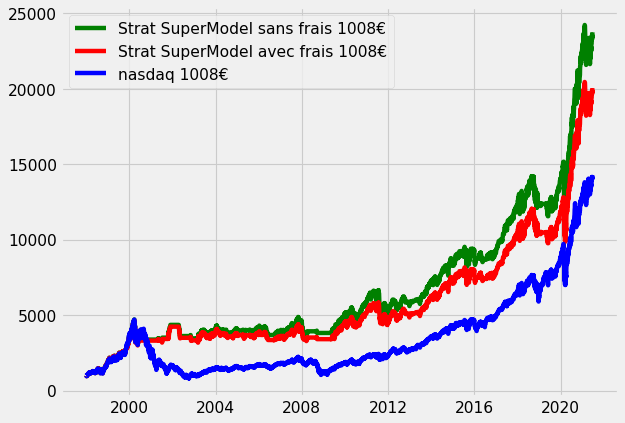

In [1093]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['Date'], df[portefeuille], color="g", label="Strat SuperModel sans frais 1008€")
plt.plot(df['Date'], df[portefeuille_frais], color="r", label="Strat SuperModel avec frais 1008€")
plt.plot(df['Date'], df.Close, color="b", label="nasdaq 1008€")
plt.legend(loc="upper left")
plt.show()

In [1094]:
supermodel.stats(portefeuille, portefeuille_frais)

Départ : 1008€

Stratégie sans frais final : 23746€
Stratégie avec frais final: 20039€
Sans stratégie final: 14267€

Total frais: 730€
Total transactions: 292


In [1097]:
df[600:650]

,Date,High,Low,Open,Close,Volume,MM_indicator,MM_acivity,MM_pf,MM_pf_frais,GAFA_indicator,GAFA_acivity,GAFA_pf,GAFA_pf_frais,AAPL,MSFT,AMZN,VIX_indicator,VIX_acivity,VIX_pf,VIX_pf_frais,RSI100_indicator,RSI100_activity,RSI100_pf,RSI100_pf_frais,supermodel_indicator,supermodel_acivity,supermodel_pf,supermodel_pf_frais
600,2000-05-19,3425.379883,3259.179932,3425.379883,3260.639893,1366930000,3585.818400,1,3072.846964,3059.236806,0.204206,0,3652.292659,3624.160622,0.007173,0.176887,0.020146,24.5478,1,1886.751919,1741.641019,32.641789,1,3507.878542,3491.294536,3,1,3266.785733,3229.216347
601,2000-05-22,3269.540039,3029.139893,3261.469971,3264.709961,1615480000,3591.835732,1,3076.682621,3063.055475,0.203874,0,3652.292659,3624.160622,0.007181,0.176589,0.020104,24.5769,1,1889.107042,1743.815008,37.988492,1,3512.257224,3495.652517,3,1,3270.863473,3233.247192
602,2000-05-23,3298.459961,3022.520020,3262.770020,3023.419922,1330440000,3596.243532,1,2849.289414,2836.669430,0.203535,0,3652.292659,3624.160622,0.007188,0.176299,0.020048,24.5880,1,1749.485845,1614.932138,32.911769,1,3252.671321,3237.293844,3,1,3029.118637,2994.282521
603,2000-05-24,3185.739990,2897.270020,3023.489990,3180.310059,2087980000,3601.003665,1,2997.143638,2983.868783,0.203144,0,3652.292659,3624.160622,0.007194,0.175963,0.019987,24.5848,0,1840.269488,1696.233571,47.294781,1,3421.457683,3405.282244,2,0,3186.304489,3147.160671
604,2000-05-25,3290.530029,3078.179932,3181.500000,3099.280029,1561840000,3605.151266,1,2920.780443,2907.843813,0.202686,0,3652.292659,3624.160622,0.007199,0.175567,0.019920,24.5885,1,1840.269488,1693.733571,37.562673,1,3334.283536,3318.520225,3,1,3186.304489,3144.660671
605,2000-05-26,3170.719971,3033.500000,3100.969971,3101.439941,1069440000,3609.254867,1,2922.815957,2909.870312,0.202238,0,3652.292659,3624.160622,0.007205,0.175175,0.019859,24.5631,0,1841.551986,1692.413947,36.298579,1,3336.607224,3320.832928,2,0,3188.525049,3144.352209
606,2000-05-30,3415.709961,3101.429932,3101.429932,3414.030029,1457360000,3615.453800,1,3217.402766,3203.152347,0.201820,0,3652.292659,3624.160622,0.007210,0.174810,0.019801,24.5352,0,1841.551986,1692.413947,46.282198,1,3672.899515,3655.535349,2,0,3188.525049,3144.352209
607,2000-05-31,3458.340088,3322.219971,3414.030029,3324.080078,1533730000,3621.171668,1,3132.633383,3118.758421,0.201388,0,3652.292659,3624.160622,0.007214,0.174435,0.019738,24.5144,0,1841.551986,1692.413947,37.333144,1,3576.129092,3559.222421,2,0,3188.525049,3144.352209
608,2000-06-01,3526.530029,3331.800049,3331.800049,3518.979980,1580240000,3628.248468,1,3316.308242,3301.619753,0.201014,0,3652.292659,3624.160622,0.007220,0.174105,0.019689,24.5208,1,1841.551986,1689.913947,48.851931,1,3785.807317,3767.909362,3,1,3188.525049,3141.852209
609,2000-06-02,3759.810059,3518.979980,3518.979980,3755.669922,1903210000,3636.353402,1,3539.366289,3523.689839,0.200700,0,3652.292659,3624.160622,0.007227,0.173809,0.019665,24.5185,0,1965.416524,1801.079167,61.086117,1,4040.444319,4021.342531,2,0,3402.988277,3350.676178
